# XGB

In [72]:
X = pd.read_pickle('data_FE_X_v2.pkl')

In [73]:
X_train = ...
y_train = ...
X_valid = ...
y_valid = ...
X_test = ...

In [74]:
ts = time.time()

model = XGBRegressor(n_estimators=200)
model.fit(
    X_train, 
    y_train, 
    eval_metric='rmse', 
    eval_set=[(X_train, y_train), (X_valid, y_valid)], 
    verbose=True,
    early_stopping_rounds = 10)

time.time() - ts

[00:54:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.9079	validation_1-rmse:3.20045
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:2.77865	validation_1-rmse:3.07774
[2]	validation_0-rmse:2.66595	validation_1-rmse:2.97385
[3]	validation_0-rmse:2.56761	validation_1-rmse:2.8827
[4]	validation_0-rmse:2.4842	validation_1-rmse:2.80655
[5]	validation_0-rmse:2.41323	validation_1-rmse:2.7411
[6]	validation_0-rmse:2.35296	validation_1-rmse:2.68412
[7]	validation_0-rmse:2.30175	validation_1-rmse:2.6335
[8]	validation_0-rmse:2.25766	validation_1-rmse:2.59491
[9]	validation_0-rmse:2.21863	validation_1-rmse:2.55383
[10]	validation_0-rmse:2.18622	validation_1-rmse:2.52175
[11]	validation_0-rmse:2.15895	validation_1-rmse:2.49423
[12]	val

148.50097513198853

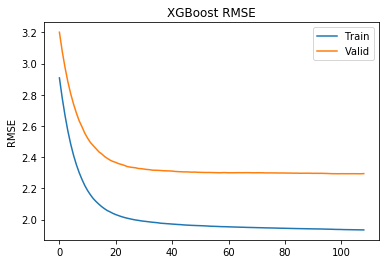

In [75]:
results = model.evals_result()
epochs = len(results['validation_1']['rmse'])
x_axis = range(0, epochs)
# plot rmse
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Valid')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

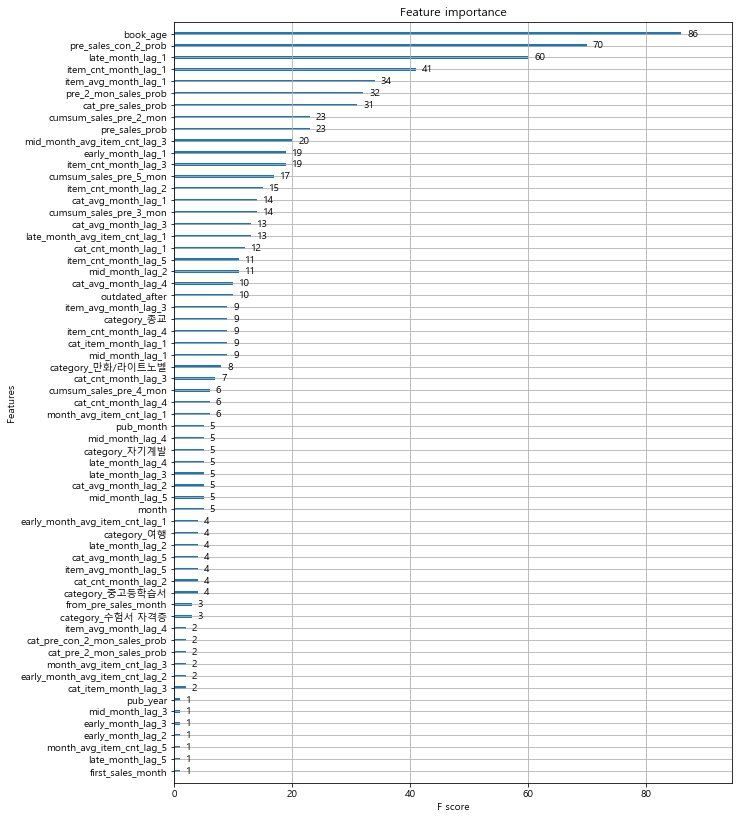

In [84]:
# 차트에서 한글 출력을 위한 설정
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

plot_features(model, (10,14))

In [86]:
import operator
importance=model.get_booster().get_score(importance_type='weight')
not_importance_feature=[]
for i in range(50):
    not_importance_feature.append(sorted(importance.items(), key=operator.itemgetter(1),reverse=False)[i][0])

In [87]:
not_importance_feature

['first_sales_month',
 'late_month_lag_5',
 'month_avg_item_cnt_lag_5',
 'early_month_lag_2',
 'early_month_lag_3',
 'mid_month_lag_3',
 'pub_year',
 'cat_item_month_lag_3',
 'early_month_avg_item_cnt_lag_2',
 'month_avg_item_cnt_lag_3',
 'cat_pre_2_mon_sales_prob',
 'cat_pre_con_2_mon_sales_prob',
 'item_avg_month_lag_4',
 'category_수험서 자격증',
 'from_pre_sales_month',
 'category_중고등학습서',
 'cat_cnt_month_lag_2',
 'item_avg_month_lag_5',
 'cat_avg_month_lag_5',
 'late_month_lag_2',
 'category_여행',
 'early_month_avg_item_cnt_lag_1',
 'month',
 'mid_month_lag_5',
 'cat_avg_month_lag_2',
 'late_month_lag_3',
 'late_month_lag_4',
 'category_자기계발',
 'mid_month_lag_4',
 'pub_month',
 'month_avg_item_cnt_lag_1',
 'cat_cnt_month_lag_4',
 'cumsum_sales_pre_4_mon',
 'cat_cnt_month_lag_3',
 'category_만화/라이트노벨',
 'mid_month_lag_1',
 'cat_item_month_lag_1',
 'item_cnt_month_lag_4',
 'category_종교',
 'item_avg_month_lag_3',
 'outdated_after',
 'cat_avg_month_lag_4',
 'mid_month_lag_2',
 'item_cnt_month

# 1-2. Submission

In [134]:
#y_pred = model.predict(X_valid).clip(0, 20)
y_test = model.predict(X_test).clip(0, 20)

submission = pd.DataFrame({
    "item_id": test.item_id, 
    "item_cnt_month": y_test
})

t = pd.Timestamp.now()
fname = f"submission_{t.month:02}{t.day:02}_{t.hour:02}{t.minute:02}.csv"
submission.to_csv(fname, index=False)

# save predictions for an ensemble
#pickle.dump(y_pred, open('xgb_train.pickle', 'wb'))
#pickle.dump(y_test, open('xgb_test.pickle', 'wb'))